# Decriminalization of drugs 
Informatie Visualisatie, June 18 2024, University of Amsterdam

## Team information
### Team members
Amanda Jansen,
Vivienne Jansen,
Chiara Patania & 
Linde van Saane

### Group Number
L5

### Team Name 
Don't do drugs

In [3]:
# Load image from link
url = 'https://toronto.ctvnews.ca/content/dam/ctvnews/en/images/2022/8/5/opioid-1-6015385-1659696091659.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© The Canadian Press / Chad Hipolito"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© The Canadian Press / Chad Hipolito


# Introduction
The legislation of drugs has been an issue for decades, with strong arguments on both sides of the debate. One perspective argues that drugs should be legalized to stop drug criminalization. Supporters of this view believe that the current approach to drug prohibition has failed, leading to a lot of social and economic problems. They argue that legalization could reduce crime rates, alleviate the burden on the criminal justice system, and redirect resources to more effective public health strategies. Furthermore, they suggest that regulation could ensure the safety and quality of substances, reducing the harm caused by adulterated or unsafe drugs. 
Conversely, the other perspective holds that drugs should not be legalized due to the potential for increased addiction and health issues. Critics of legalization argue that making drugs more accessible could lead to higher rates of substance abuse and addiction, resulting in significant public health challenges. They emphasize the potential for increased healthcare costs, the negative impact on families and communities, and the risk of normalizing drug use, particularly among young people. 

In 2001 Portugal's decision to decriminalize drugs marked a critical moment in global drug policy. Rather than punishing individuals caught with small amounts of drugs, Portugal opted to treat drug use as a public health issue. This shift redirected resources from law enforcement towards prevention, treatment, and harm reduction services. 
Similarly, Oregon's historic move in 2021 to decriminalize the possession of small amounts of all drugs, alongside the legalization of psilocybin mushrooms for therapeutic use, has drawn international attention. Oregon's initiative aims to prioritize addiction treatment and recovery programs over criminal penalties. It reflects a growing acknowledgment in the United States that punitive drug policies have not effectively addressed addiction and related issues, instead perpetuating cycles of incarceration and social harm.

Both Portugal and Oregon exemplify different approaches to addressing drug-related challenges through decriminalization and legalization, respectively. Their experiences contribute valuable insights into the ongoing global discourse on drug policy reform, highlighting alternative strategies that prioritize public health and harm reduction over punitive measures.

During this project we will delve into these contrasting viewpoints, utilizing data visualization to present a comprehensive narrative. By examining the social, economic, and health-related data from the country Portugal and the US state Oregon, we aim to provide a balanced and informative discussion on the future of drug legislation.

# Dataset and Preprocessing

## Perspective 1 - Drugs should be legalized to stop drug criminalization
### First argument: Reduction in crime rates
#### Argument: Legalization reduces drug-related crime.
The first dataset focusses on drug related crimes and can be found with the following link: https://www.unodc.org/unodc/en/data-and-analysis/wdr2022_annex.html
<br>
The variables in this dataset are: 'Region', 'SubRegion', 'Country/Territory', 'Type of offence', 'Year', 'Drugs', 'Total', 'Males', 'Females', 'Unknown/Other/Third/Intersex', 'Adults', 'Juveniles', 'Specify year'. For the analyses and data visualisation we have filtered the data to the region Europe, dropped the NaN rows and only focussed on the variables 'Country/Territory', 'Year' and 'Total'. 

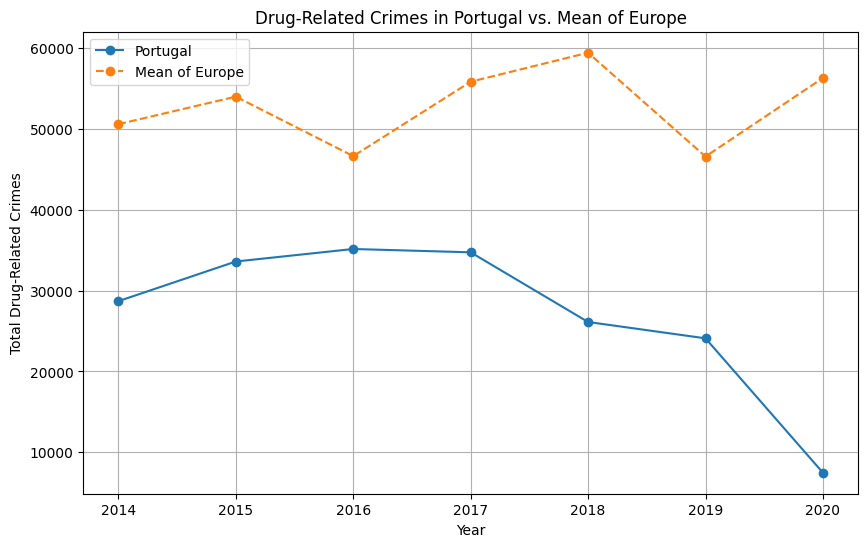

Figure 1: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 untill 2020


In [46]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("9_Misdaden.csv")

# Filter for Europe
europe_df = df[df['Region'] == 'Europe']

# Group by Country/Territory and Year, and sum the Total crimes
grouped_df = europe_df.groupby(['Country/Territory', 'Year']).agg({'Total': 'sum'}).reset_index()

# Filter for Portugal
portugal_df = grouped_df[grouped_df['Country/Territory'] == 'Portugal']

# Calculate the mean for Europe (excluding Portugal)
europe_mean_df = grouped_df[grouped_df['Country/Territory'] != 'Portugal'].groupby('Year').agg({'Total': 'mean'}).reset_index()
europe_mean_df.rename(columns={'Total': 'Mean of Europe'}, inplace=True)

# Merge Portugal data with Europe mean data
merged_df = pd.merge(portugal_df, europe_mean_df, on='Year', how='left')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Total'], label='Portugal', marker='o')
plt.plot(merged_df['Year'], merged_df['Mean of Europe'], label='Mean of Europe', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Drug-Related Crimes')
plt.title('Drug-Related Crimes in Portugal vs. Mean of Europe')
plt.legend()
plt.grid(True)
plt.show()

# Set the subtitle text
subtitle = "Figure 1: Drug-Related crimes in Portugal vs. Mean of Europe, from 2014 untill 2020"
print(subtitle)

The second dataset used regarding reduction in crime rates can be found with the following link: https://dataunodc.un.org/
<br>
The variables in this dataset are: 'Country', '2021', '2020','2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007'. 
<br>
For the analysis and data visualisation the NaN rows were deleted and the column names renamed for easier acces.

/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


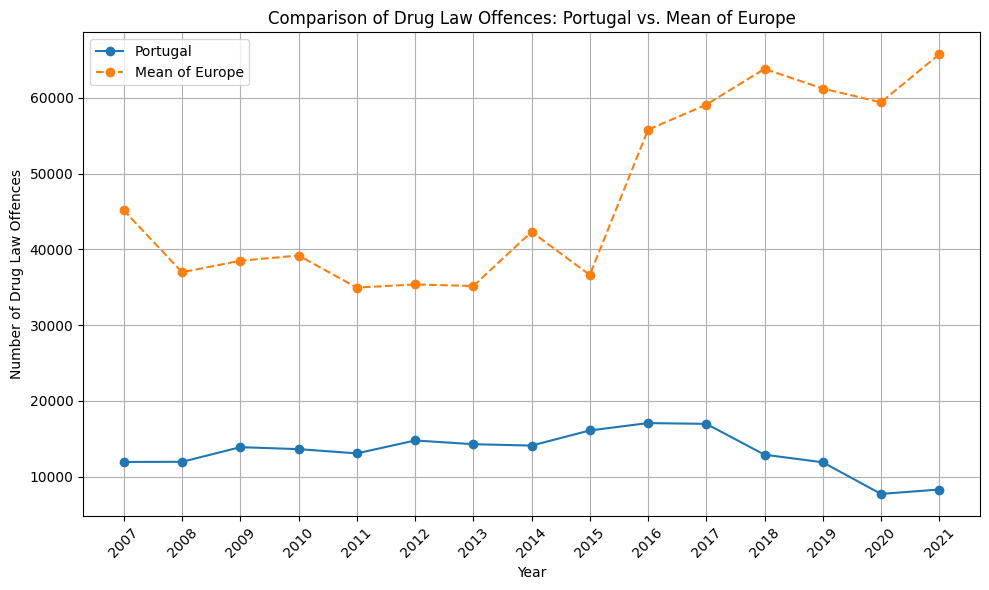

Figure 2: Comparison of drug law offences in Portugal versus the mean of Europe, from 2007 untill 2021


In [47]:
df = pd.read_excel("10_drugsdelicten.xlsx", header=2)

# Drop rows that are completely NaN
df.dropna(how='all', inplace=True)

# Rename columns for easier access
df.columns = ['Country', '2021', '2020', '2019', '2018', '2017', 
              '2016', '2015', '2014', '2013', '2012', '2011', 
              '2010', '2009', '2008', '2007']

# Drop any rows with NaN in the 'Country' column
df.dropna(subset=['Country'], inplace=True)

# Convert numerical columns to numeric types
numeric_columns = df.columns.drop('Country')
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter for Portugal
portugal_data = df[df['Country'] == 'Portugal'][numeric_columns].squeeze().dropna().astype(int)

# Calculate mean for Europe (excluding Portugal)
europe_data = df[df['Country'] != 'Portugal'][numeric_columns]
europe_mean = europe_data.mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot Portugal data
plt.plot(portugal_data.index.astype(int), portugal_data.values, label='Portugal', marker='o')

# Plot Europe mean data
plt.plot(europe_mean.index.astype(int), europe_mean.values, label='Mean of Europe', marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Number of Drug Law Offences')
plt.title('Comparison of Drug Law Offences: Portugal vs. Mean of Europe')
plt.legend()
plt.grid(True)
plt.xticks(range(2007, 2022),rotation=45)
plt.tight_layout()
plt.show()

# Set the subtitle text
subtitle = "Figure 2: Comparison of drug law offences in Portugal versus the mean of Europe, from 2007 untill 2021"
print(subtitle)

### Second argument: Public health and safety
#### Argument: Regulation ensures the safety and quality of substances, reducing harm from adulterated drugs.
DRAFT
<br>
Supporting Data: Purity of drug, Portugal versus mean of other European countries. 
<br>
Data Variables: 'Country', 'Year', 'Drugtype'. And then the values will contain the purity of the drug.
<br>
Data visualisation: bar plot with Portugal values in blue and the European mean values in orange (or a couple of countries in different colours), on the x-axis there will be the different types of drugs and on the y-axis the purity of the drug. 

### Third argument: Burden on criminal justice system
#### Argument: Legalization alleviates the burden on the criminal justice system and redirects resources to public health.
DRAFT
<br>
Supporting Data: Decrease in prisoners sentenced for drug related offences. While the European average has gradually risen over the past twenty years (from 14 to 18%), the proportion of people sentenced for drug offences in Portuguese prisons has fallen dramatically to 15.7% in 2019 — now below the European average. The data set can be found on https://wp.unil.ch/space/space-i/annual-reports/ 
<br>
Data Variables: x
<br>
Data visualisation: Line graph

## Second Perspective - Drugs should not be legalized because of the potential for increased addiction and health issues
### First argument: Increase in addiction rates
#### Argument: Legalization leads to higher rates of substance abuse and addiction.
DRAFT 
<br>
Supporting Data: Correlation between drug legalization and addiction rates.
<br>
Data Variables: Addiction rates (before and after legalization), rates of treatment admissions for addiction, types of substances used.
<br>
Data visualisation: For example a (interactive) thematic map of US states with addiction rates. Another visualisation containing a line or bar chartshowing the addiction rates before and after legalization. 

### Second argument: Public health 
#### Argument: increase in druguse and deaths related to drugs
In 2021, Oregon passed a law decriminalizing all drugs. Opponents of this law now argue that as a result, deaths due to overdose have spiked in recent years. This trend is depicted in the graph below.
Supporting Data: Deathrate over the years per state. This dataset can be found through the following link: https://www.cdc.gov/nchs/pressroom/sosmap/drug_poisoning_mortality/drug_poisoning.htm 
<br>
Data variables: 'Location', 'Death rate', 'Deaths'.
<br>
For the analysis and datavisualisation we have only focussed on a couple of states (Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington) and their death rate over the years. 
<br> Another option for visualisation we might add is a map with all the different states and their death rate and death numbers, for a more complete picture. 

/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


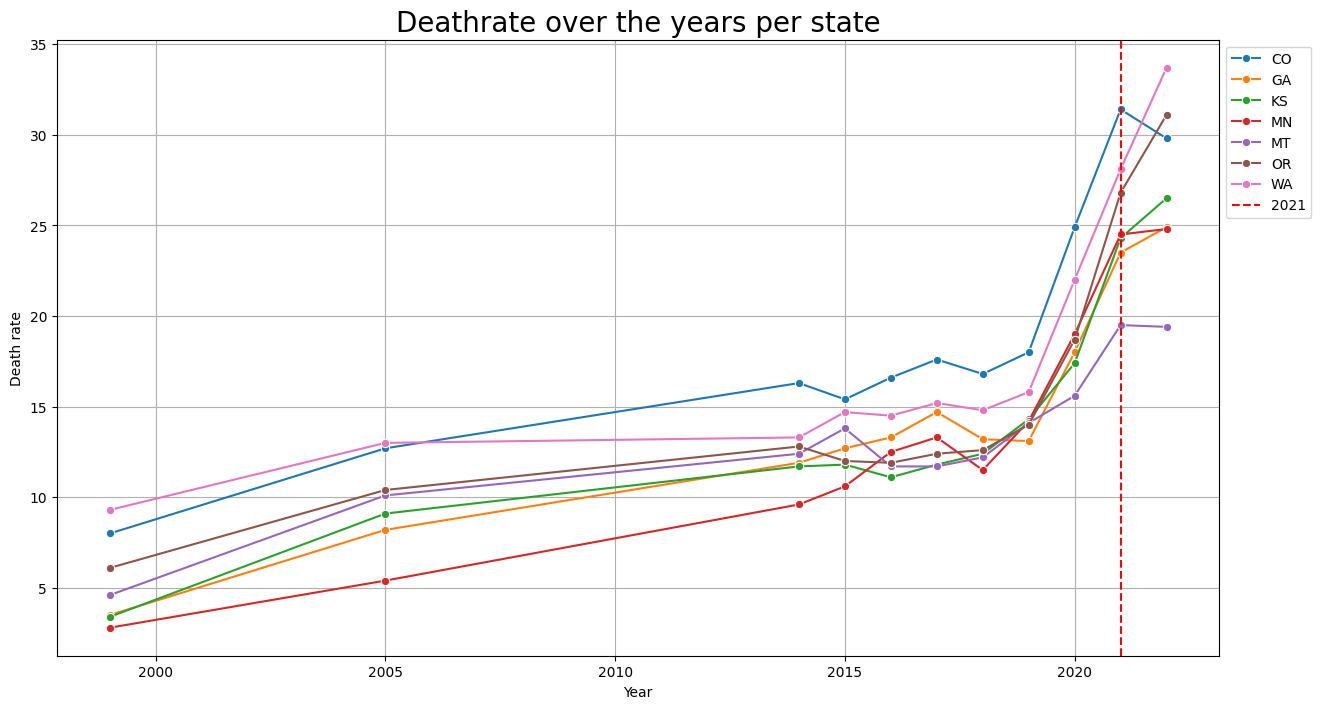

Figure 3: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington.


In [43]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

statesdata = pd.read_csv("statesdata.csv")

statesdata = statesdata[["YEAR","STATE","RATE"]]

pivot_df = statesdata.pivot_table(index='YEAR', columns='STATE', values='RATE')
or_correlations = pivot_df.corrwith(pivot_df['OR']).drop('OR')

# states selected for hight correlation and matching rates
desired_states = ['OR','CO','GA', 'KS','MN','MT','WA']
statesdata = statesdata[statesdata['STATE'].isin(desired_states)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=statesdata, x='YEAR', y='RATE', hue='STATE', palette='tab10', marker='o')
plt.axvline(x=2021, color='red', linestyle='--', label='2021')
plt.xlabel('Year')
plt.ylabel('Death rate')
plt.title('Deathrate over the years per state', fontsize=20)
plt.legend(fontsize=0.2)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

# Set the subtitle text
subtitle = "Figure 3: Deathrate of drug overdose mortality for the states Colorado, Georgia, Kansas, Minnesota, Montana, Oregon and Washington."
print(subtitle)

In [13]:
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

df = pd.read_csv("statesdata.csv")

df.columns = df.columns.str.strip()

# Check for 'YEAR' column
if 'YEAR' not in df.columns:
    raise KeyError("The 'YEAR' column is missing or misspelled in the DataFrame.")

# Initialize the Dash app
app = dash.Dash(__name__)

# Calculate min and max values for RATE and DEATHS to set fixed color scale
min_rate = df['RATE'].min()
max_rate = df['RATE'].max()
min_deaths = df['DEATHS'].min()
max_deaths = df['DEATHS'].max()

app.layout = html.Div([
    html.H1("Interactive US Map with Data Per State"),
    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in df['YEAR'].unique()],
        value=df['YEAR'].min()
    ),
    dcc.Graph(id='us-map')
])

@app.callback(
    Output('us-map', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_map(selected_year):
    # Filter data based on the selected year
    filtered_df = df[df['YEAR'] == selected_year]

    # Create the choropleth map
    fig = px.choropleth(
        filtered_df,
        locations='STATE',
        locationmode='USA-states',
        color='RATE',
        scope='usa',
        color_continuous_scale='Viridis',
        range_color=(min_rate, max_rate),
        labels={'RATE': 'Death Rate'},
        hover_name='STATE',  # Show state abbreviation on hover
        hover_data={'RATE': True, 'DEATHS': True},  # Additional data to display on hover
        template='plotly'  # Use the plotly template for hover labels
    )

    fig.update_layout(
        title_text=f'US Data for {selected_year} - Death Rate',
        geo=dict(
            lakecolor='rgb(255, 255, 255)',
        )
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)



### Third argument: Impact on youth
#### Argument: Legalization normalizes drug use and increases accessibility, particularly among young people.
DRAFT
<br>
Possible supporting Data: Correlation between drug legalization and drug use rates among youth.

# Reflection

# Work Distribution

# References